In [723]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import re 
%matplotlib inline

In [337]:
pd.set_option('display.max_rows', 600)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 2000)
pd.set_option('display.max_colwidth', 1000)

In [712]:
df= pd.read_csv('clean_ntsb.csv',index_col=0, header=0)#,parse_dates=['Event Date'])# , parse_dates=['Event Date'])
df['Date']= pd.to_datetime(df['Date'])

In [605]:
df.head()

,Id,Investigation,Date,Location,Country,Damage,Make,Model,EnginesNo,EngineType,Carrier,Weather,Phase,GeoPoint,Make_Model,Year
0,20150818X00406,Incident,2015-08-17,"Page, AZ",United States,Minor,QUEST,KODIAC 100,1,Turbo Prop,ARROW WEST AVIATION (DBA: REDTAIL AVIATION),VMC,TAKEOFF,"37.024445, 111.630834",QUEST KODIAC 100,2015
1,20160827X31134,Accident,2016-08-27,"Pascagoula, FL",United States,Substantial,BOEING,737,2,Turbo Fan,Southwest Airlines,VMC,OTHER,Missing,BOEING 737,2016
2,20170429X35104,Accident,2017-04-28,"Amarillo, TX",United States,Destroyed,PILATUS AIRCRAFT LTD,PC 12,1,Turbo Prop,RICO AVIATION LLC,IMC,TAKEOFF,"35.196389, -101.704722",PILATUS AIRCRAFT LTD PC 12,2017
3,20180618X32836,Accident,2018-06-15,"Kotzebue, AK",United States,Substantial,CESSNA,180K,1,Reciprocating,AIRFRAME INNOVATIONS INC,VMC,TAKEOFF,"66.135, -160.2575",CESSNA 180K,2018
4,20130814X15751,Accident,2013-08-14,"Birmingham, AL",United States,Destroyed,AIRBUS,A300 - F4 622R,2,Turbo Fan,UNITED PARCEL SERVICE CO (DBA: UNITED PARCEL SERVICE CO),UNK,APPROACH,"33.563889, -86.802222",AIRBUS A300 - F4 622R,2013


In [314]:
df.shape

(2085, 13)

In [448]:
df.isnull().sum()

Id               0
Investigation    0
Date             0
Location         0
Country          0
Damage           0
Make             0
Model            0
EnginesNo        0
EngineType       0
Carrier          0
Weather          0
Phase            0
GeoPoint         0
Make_Model       0
dtype: int64

In [455]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2085 entries, 0 to 2084
Data columns (total 15 columns):
Id               2085 non-null object
Investigation    2085 non-null object
Date             2085 non-null object
Location         2085 non-null object
Country          2085 non-null object
Damage           2085 non-null object
Make             2085 non-null object
Model            2085 non-null object
EnginesNo        2085 non-null int32
EngineType       2085 non-null object
Carrier          2085 non-null object
Weather          2085 non-null object
Phase            2085 non-null object
GeoPoint         2085 non-null object
Make_Model       2085 non-null object
dtypes: int32(1), object(14)
memory usage: 252.5+ KB


# Under which meteorological conditions accidents occur most?

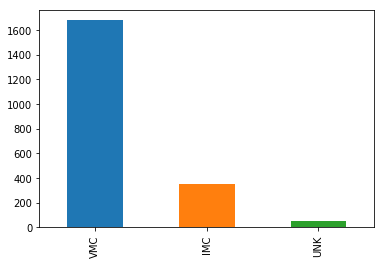

In [466]:
pd.value_counts(df['Weather']).plot.bar()

Accidents occured in Visual Meteorological Conditions more than the Instrument Meteorological Conditions. IFR flights relies on aircraft instruments. In VMC, visual references are used as primary data. Technological developments in aviation instruments can effect the accuracy of the flight under IFR conditions.

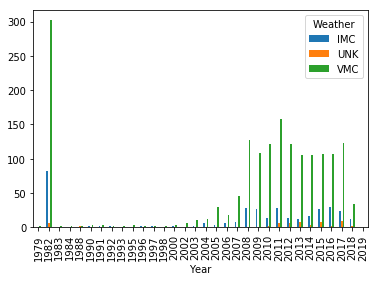

In [700]:
df.groupby(['Year','Weather']).size().unstack().plot(kind='bar')

This chart shows that IFR effect on accidents were higher tham present day.

# At which phase of flight crashes occur most?

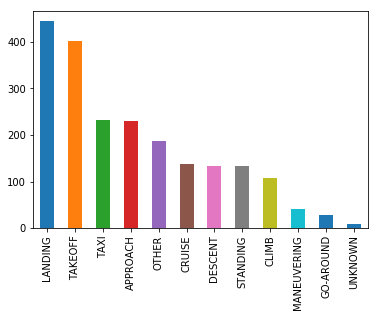

In [355]:
pd.value_counts(df['Phase']).plot.bar()

Based on the chart above landing and take-off phases of a flight are the most critical time frames.

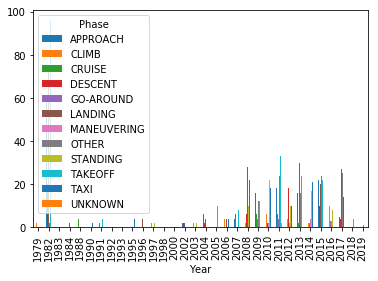

In [701]:
df.groupby(['Year','Phase']).size().unstack().plot(kind='bar')

# Which make has the highest number of accidents?

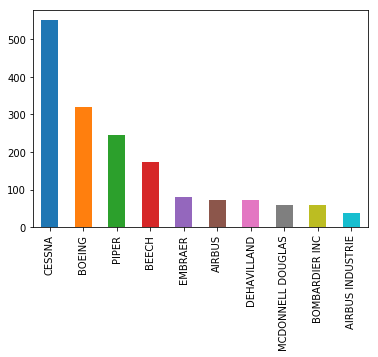

In [361]:
df['Make'].value_counts(ascending=False)[:10].plot.bar()

To be able to make a sound judgment total flights hours of each make should be taken into consideration.

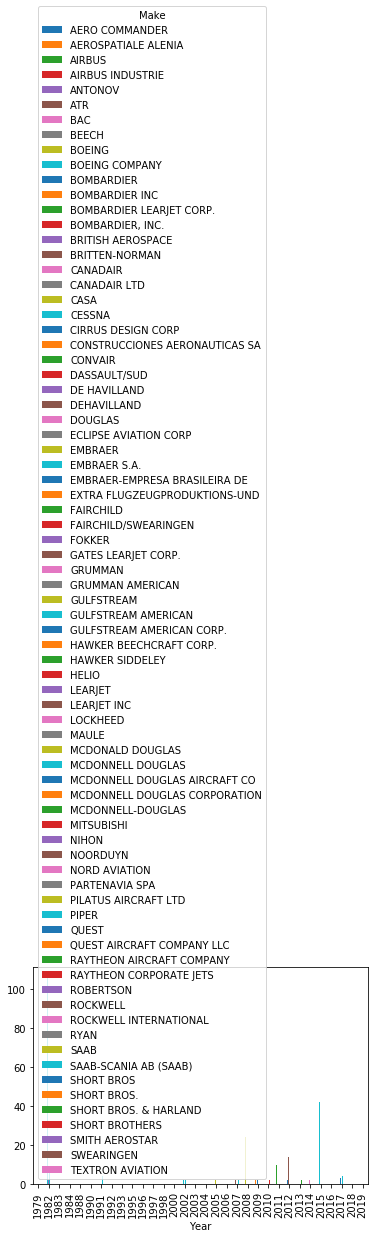

In [704]:
df.groupby(['Year','Make']).size().unstack().plot(kind='bar')

# Which carrier has highest number of accidents?

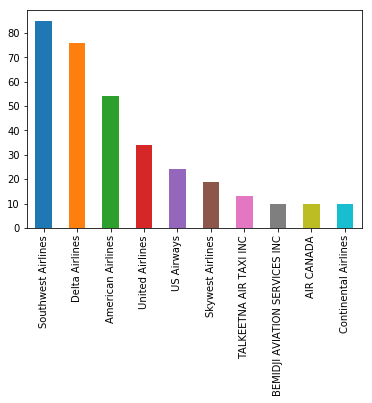

In [383]:
df['Carrier'].value_counts()[:10].plot.bar()

To be able to make a sound judgment total flights hours of each carrier should be taken into consideration.

# Which type of aircraft has highest number of accidents?

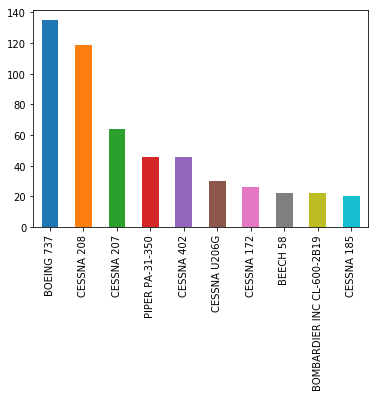

In [591]:
df.Make_Model.value_counts(ascending=False)[:10].plot.bar()

Time distribution should be observed between each accident of a same make and model.

# Is there a relation between number of engines and accidents?

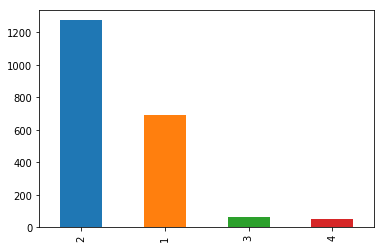

In [592]:
df['EnginesNo'].value_counts().plot.bar()

Majority of the aircrafts involved in an accident were twin engine. Total flight hours should also be considered.

# Is number of accidents decreasing over time?

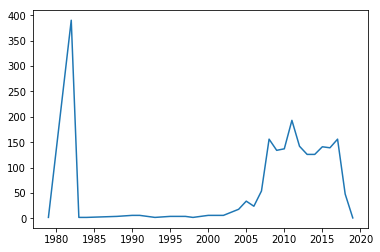

In [612]:
df['Date'].dt.year.value_counts().sort_index().plot()

Decreased number of accicent between 1982 and 2004 might be the result of applied new practises after huge number of accidents.